In [1]:
import numpy as np
import pandas as pd

import scipy.integrate as integrate

import matplotlib.pylab as plt
from matplotlib import gridspec
plt.style.use('ggplot')
#plt.rc('text', usetex=True)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


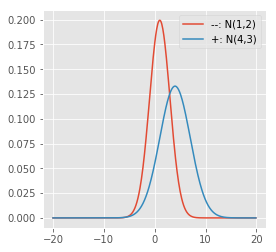

In [2]:
gaussian=lambda x,(m,s): 1./np.sqrt(2*np.pi*(s**2)) * np.e**(-1./2 * ((x-m)/s)**2)

pos=[4,3]
neg=[1,2]
x=np.arange(-20,20,0.1)
fig=plt.figure()
fig.set_size_inches(4,4)
plt.plot(x, gaussian(x, neg), label='--: N(1,2)')
plt.plot(x, gaussian(x, pos), label='+: N(4,3)')
plt.legend()
plt.show()

In [3]:
def TP(decision_boundary=0.0, ax=None, plot=False, pos=pos):
    if plot:
        x=np.arange(-20,20,0.1)
        ax.plot(x, gaussian(x, neg), label='--: N(1,2)')
        ax.plot(x, gaussian(x, pos), label='+: N(4,3)')
        ax.axvline(x=decision_boundary, color='black', linestyle='--')
        ax.fill_between(x, y1=gaussian(x, pos), where=x>decision_boundary, alpha=0.5)
        ax.set_title('True Positive')
    return 1.-integrate.quad(gaussian, -1.*np.inf, decision_boundary, args=pos)[0]

In [4]:
def FN(decision_boundary=0.0, ax=None, plot=False, pos=pos):
    if plot:
        x=np.arange(-20,20,0.1)
        ax.plot(x, gaussian(x, neg), label='--: N(1,2)')
        ax.plot(x, gaussian(x, pos), label='+: N(4,3)')
        ax.axvline(x=decision_boundary, color='black', linestyle='--')
        ax.fill_between(x, y1=gaussian(x, pos), where=x<decision_boundary, alpha=0.5)
        ax.set_title('False Negative')
    return integrate.quad(gaussian, -1.*np.inf, decision_boundary, args=pos)[0]

In [5]:
def FP(decision_boundary=0.0, ax=None, plot=False, neg=neg):
    if plot:
        x=np.arange(-20,20,0.1)
        ax.plot(x, gaussian(x, neg), label='--: N(1,2)')
        ax.plot(x, gaussian(x, pos), label='+: N(4,3)')
        ax.axvline(x=decision_boundary, color='black', linestyle='--')
        ax.fill_between(x, y1=gaussian(x, neg), where=x>decision_boundary, alpha=0.5)
        ax.set_title('False Positive')
    return 1.-integrate.quad(gaussian, -1.*np.inf, decision_boundary, args=neg)[0]

In [6]:
def TN(decision_boundary=0.0, ax=None, plot=False, neg=neg):
    if plot:
        ax.plot(x, gaussian(x, neg), label='--: N(1,2)')
        ax.plot(x, gaussian(x, pos), label='+: N(4,3)')
        ax.axvline(x=decision_boundary, color='black', linestyle='--')
        ax.fill_between(x, y1=gaussian(x, neg), where=x<decision_boundary, alpha=0.5)
        ax.set_title('True Negative')
    return integrate.quad(gaussian, -1.*np.inf, decision_boundary, args=neg)[0]

In [7]:
tp_all=[]
fp_all=[]
DB_all=[]

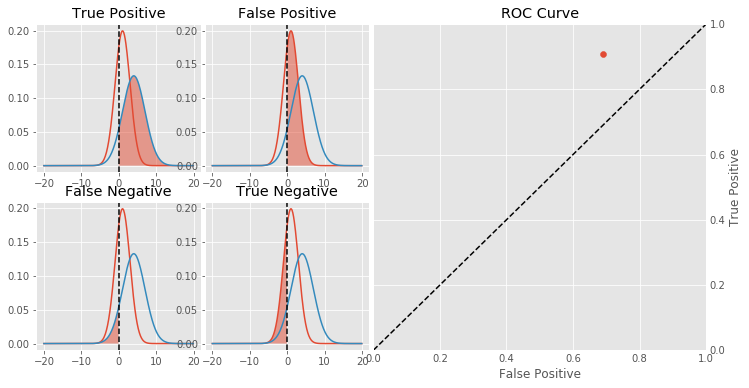

In [8]:
DB=0.0
DB_all.append(DB)
plot=True
# fig, ax=plt.subplots(2,2, sharex=True, sharey=True)
gs = gridspec.GridSpec(2,4, wspace=0.025)
fig=plt.figure()
fig.set_size_inches(12,6)
tp_ax=plt.subplot(gs[0,0])
fp_ax=plt.subplot(gs[0,1])
fn_ax=plt.subplot(gs[1,0])
tn_ax=plt.subplot(gs[1,1])
roc_ax=plt.subplot(gs[:,2:])

tp=TP(decision_boundary=DB, ax=tp_ax, plot=plot)
fn=FN(decision_boundary=DB, ax=fn_ax, plot=plot)
fp=FP(decision_boundary=DB, ax=fp_ax, plot=plot)
tn=TN(decision_boundary=DB, ax=tn_ax, plot=plot)

roc_ax.set_title('ROC Curve')
tp_all.append(tp)
fp_all.append(fp)
roc_ax.scatter(fp_all,tp_all)
roc_ax.plot(x,x, linestyle='--', color='black')
roc_ax.set_ylabel('True Positive')
roc_ax.yaxis.set_label_position("right")
roc_ax.yaxis.tick_right()
roc_ax.set_xlabel('False Positive')
roc_ax.set_xlim(0,1)
roc_ax.set_ylim(0,1)
roc_ax.tick_params(length=0)

if plot: 
#     plt.tight_layout
    plt.show()

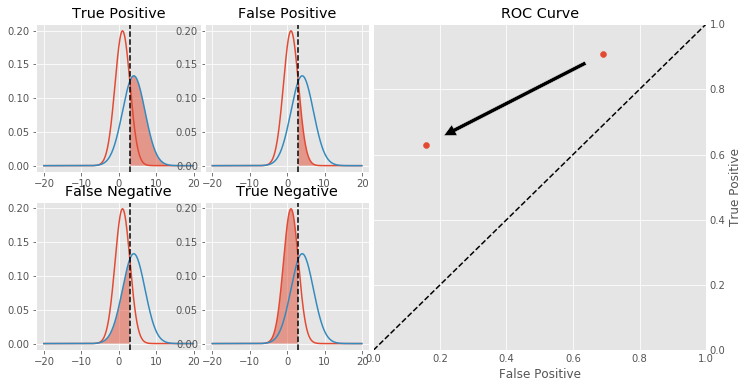

In [9]:
DB=3.
DB_all.append(DB)
plot=True
# fig, ax=plt.subplots(2,2, sharex=True, sharey=True)
gs = gridspec.GridSpec(2,4, wspace=0.025)
fig=plt.figure()
fig.set_size_inches(12,6)
tp_ax=plt.subplot(gs[0,0])
fp_ax=plt.subplot(gs[0,1])
fn_ax=plt.subplot(gs[1,0])
tn_ax=plt.subplot(gs[1,1])
roc_ax=plt.subplot(gs[:,2:])

tp=TP(decision_boundary=DB, ax=tp_ax, plot=plot)
fn=FN(decision_boundary=DB, ax=fn_ax, plot=plot)
fp=FP(decision_boundary=DB, ax=fp_ax, plot=plot)
tn=TN(decision_boundary=DB, ax=tn_ax, plot=plot)

roc_ax.set_title('ROC Curve')
tp_all.append(tp)
fp_all.append(fp)
roc_ax.scatter(fp_all,tp_all)
roc_ax.annotate("",
            xy=(fp_all[-1],tp_all[-1]),
            xytext=(fp_all[-2],tp_all[-2]),
            arrowprops=dict(facecolor='black', shrink=0.1)
            )
roc_ax.plot(x,x, linestyle='--', color='black')
roc_ax.set_ylabel('True Positive')
roc_ax.yaxis.set_label_position("right")
roc_ax.yaxis.tick_right()
roc_ax.set_xlabel('False Positive')
roc_ax.set_xlim(0,1)
roc_ax.set_ylim(0,1)
roc_ax.tick_params(length=0)

if plot: 
#     plt.tight_layout
    plt.show()

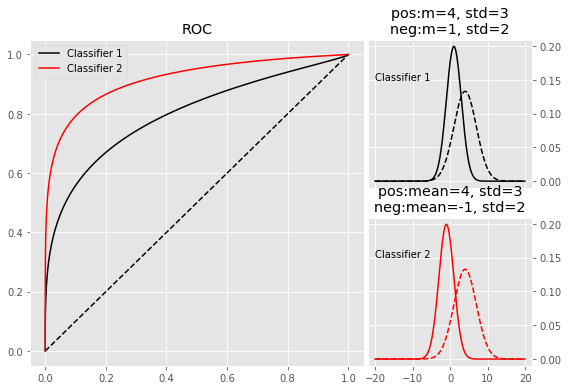

In [38]:
gs = gridspec.GridSpec(2,3, wspace=0.025)
fig=plt.figure()
fig.set_size_inches(9,6)
roc_ax=plt.subplot(gs[:,:2])
roc_ax.set_title('ROC')
gauss1_ax=plt.subplot(gs[0,-1])
gauss2_ax=plt.subplot(gs[1,-1])

x=np.arange(-20,20,0.1)

pos=[4,3]
neg=[1,2]
fp_all=[]
tp_all=[]
for DB in x:
    tp=TP(decision_boundary=DB, pos=pos)
    fn=FN(decision_boundary=DB, pos=pos)
    fp=FP(decision_boundary=DB, neg=neg)
    tn=TN(decision_boundary=DB, neg=neg)
    fp_all.append(fp)
    tp_all.append(tp)
roc_line1,=roc_ax.plot(fp_all, tp_all, color='black')
roc_ax.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), linestyle='--', color='black')

gauss1_ax.plot(x, gaussian(x, neg), color='black')
gauss1_ax.plot(x, gaussian(x, pos), color='black', linestyle='--')
gauss1_ax.set_title('pos:m={0}, std={1}\nneg:m={2}, std={3}'.format(pos[0], pos[1], neg[0], neg[1]))
gauss1_ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
gauss1_ax.yaxis.set_label_position("right")
gauss1_ax.yaxis.tick_right()
gauss1_ax.annotate("Classifier 1", xy=(-20,0.15))

pos=[4,3]
neg=[-1,2]
fp_all=[]
tp_all=[]
for DB in x:
    tp=TP(decision_boundary=DB, pos=pos)
    fn=FN(decision_boundary=DB, pos=pos)
    fp=FP(decision_boundary=DB, neg=neg)
    tn=TN(decision_boundary=DB, neg=neg)
    fp_all.append(fp)
    tp_all.append(tp)
roc_line2,=roc_ax.plot(fp_all, tp_all, color='red')

gauss2_ax.plot(x, gaussian(x, neg), color='red')
gauss2_ax.plot(x, gaussian(x, pos), color='red', linestyle='--')
gauss2_ax.set_title('pos:mean={0}, std={1}\nneg:mean={2}, std={3}'.format(pos[0], pos[1], neg[0], neg[1]))
gauss2_ax.yaxis.set_label_position("right")
gauss2_ax.yaxis.tick_right()
gauss2_ax.annotate("Classifier 2", xy=(-20,0.15))

roc_ax.legend((roc_line1, roc_line2),('Classifier 1', 'Classifier 2'))
plt.show()


In [40]:
import os
os.getcwd()

'/Users/yogeshluthra/Documents/OneDrive/DeepLearning/CS231n/Assignments/assignment1'